<h1><center>Introduction to Programming in Python III</center></h1>
<h2><center>Pandas for Data Analysis and Manipulation</center></h2>
<center><h3>Notebook 2 - Working with Data</h3></center>

We will be using the [MovieLens](https://movielens.org/) dataset collected by [GroupLens Research](https://grouplens.org/datasets/movielens/). There are multiple MovieLens datasets available at the GroupLens Research page; however, today we will be using the **small dataset only**.

Link: https://grouplens.org/datasets/movielens/

Link for downloading the small dataset: http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

Let's assume the following. You have already:

1) Created a folder called *data* inside the directory containing your notebooks.

2) Downloaded the small dataset and extracted its contents to the *data* folder.

In [1]:
import numpy as np
import pandas as pd
import os

### Loading Data

Create a shorter name for the os.path.join function.

In [2]:
pjoin = os.path.join

Examine the data directory structure.

In [3]:
ls

data/      nb1.ipynb  nb2.ipynb


In [4]:
ls data

ml-latest-small/ results/


In [5]:
ls data/ml-latest-small

README.txt   links.csv    movies.csv   ratings.csv  tags.csv


We use the `os.path.join` function rather than explicitly joining the directories and files using a path separator because different operating systems use different path separators, and os.path.join handles that complexity for us. It is cross-compatible between Linux/Mac (which both use '/' as the path separator) and Windows (which uses '\\').

Using our pjoin alias for the `os.path.join` function, create a place to store the paths to the data directory and 4 CSV files.

In [6]:
ml_dir = pjoin('data', 'ml-latest-small')

links_file = pjoin(ml_dir, 'links.csv')
movies_file = pjoin(ml_dir, 'movies.csv')
ratings_file = pjoin(ml_dir, 'ratings.csv')
tags_file = pjoin(ml_dir, 'tags.csv')

In [7]:
#pd.read_csv?

In [8]:
ratings_df = pd.read_csv(ratings_file)
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


An integer index was automatically created for each row and by default the header line was used to assign names to columns.

Placing the name of the dataframe on a line by itself causes the dataframe to be printed with formatting.

You can also print a Pandas DataFrame, but the output isn't formatted as nicely as it is using the approach above in the Jupyter Notebook.

In [9]:
print(ratings_df)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


### Viewing Data

Show the first 5 rows

In [10]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Show the first 10 rows

In [11]:
ratings_df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


Show the last 10 rows

In [12]:
ratings_df.tail(10)

,userId,movieId,rating,timestamp
100826,610,162350,3.5,1493849971
100827,610,163937,3.5,1493848789
100828,610,163981,3.5,1493850155
100829,610,164179,5.0,1493845631
100830,610,166528,4.0,1493879365
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


### Data Selection

Get a single column as a series

In [13]:
ratings_df['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

Alternative way of getting the same column

In [14]:
ratings_df.rating

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

Selection via `[]` which slices the rows.

Get the first three rows returned as a DataFrame

In [15]:
ratings_df[0:3]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


Selection by index value (aka label)

Get the first row returned as a Series

In [16]:
ratings_df.loc[0]

userId               1.0
movieId              1.0
rating               4.0
timestamp    964982703.0
Name: 0, dtype: float64

Selection on multi-axis by label (index values and column lables)

In [17]:
ratings_df.loc[:, ['movieId', 'rating']]

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
100831,166534,4.0
100832,168248,5.0
100833,168250,5.0
100834,168252,5.0


#### Selection by Position using iloc

Get the first three rows by index position

In [18]:
ratings_df.iloc[0:3]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


Get the first three rows and the last two columns by position

In [19]:
ratings_df.iloc[0:3, -2:]

,rating,timestamp
0,4.0,964982703
1,4.0,964981247
2,4.0,964982224


Get a single scalar value explicitly.

In [20]:
ratings_df.iloc[0, 0]

1

Alternatively use *iat* method for faster access to the same value

In [21]:
ratings_df.iat[0, 0]

1

#### Boolean Indexing

Get all the ratings less than or equal to 1.0

In [22]:
ratings_df[ratings_df['rating'] <=  1.0]

,userId,movieId,rating,timestamp
205,1,3176,1.0,964983504
261,3,31,0.5,1306463578
262,3,527,0.5,1306464275
263,3,647,0.5,1306463619
264,3,688,0.5,1306464228
...,...,...,...,...
100374,610,68319,1.0,1493845505
100415,610,72424,0.5,1493849030
100426,610,74075,1.0,1493848880
100734,610,120635,1.0,1493850489


Get all the five star ratings

In [23]:
ratings_df[ratings_df['rating'] ==  5.0]

,userId,movieId,rating,timestamp
3,1,47,5.0,964983815
4,1,50,5.0,964982931
6,1,101,5.0,964980868
8,1,151,5.0,964984041
9,1,157,5.0,964984100
...,...,...,...,...
100814,610,158238,5.0,1479545219
100829,610,164179,5.0,1493845631
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


### Missing Data

Another main feature of Pandas is its ability to handle missing data. Pandas primarily uses the np.nan (Not-a-number) value to represent missing data. By default the nan value is not included in computations.

For *Series* and *DataFrames*, we can easily check if any or all values contain nan using combinations of *isna* with *any* or *all*.

In [24]:
ratings_df['rating'].isna().any()

False

In [25]:
ratings_df['rating'].isna().all()

False

In [26]:
ratings_df.isna().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

To drop any rows with missing data we can use the *dropna* method.

e.g.

`another_df.dropna(how='any')`

Alternatively, to fill in rows with missing data we can use the *fillna* method.

`another_df.fillna(value=5.0)`

Our ratings dataset does not contain any nan values as we have proven above, but it is good practice to check and reason how to deal with nan values as you analyze data.

### Attributes and Underlying Data

In [27]:
ratings_df.shape

(100836, 4)

In [28]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [29]:
ratings_df.index

RangeIndex(start=0, stop=100836, step=1)

### DataFrame *info* method

Use the *info* method *DataFrame* to view some information about the DataFrame.

In [30]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Notice we can gather the following information very quickly using the *info* method:

- number of entries
- first and last index value
- number of columns
- column number, name, non-null count, and dtype
- memory usage of the dataframe

### Handling timestamp

Pandas did a good job for us picking the dtypes for each column (rather than treating each field as a string as would be the case with parsing a CSV file using a traditional CSV parsing library).

The timestamp field is treated as an int64 because the timestamp values are all integers. From the README.txt file:

"Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970."

This is known as *UNIX Time*: https://en.wikipedia.org/wiki/Unix_time

Fortunately, Pandas handles time-series data very well and here is an example: converting an integer or string formatted time to a more sophisticated datetime dtype.

In [31]:
ratings_df['timestamp_datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df

,userId,movieId,rating,timestamp,timestamp_datetime
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-03 21:53:22
100832,610,168248,5.0,1493850091,2017-05-03 22:21:31
100833,610,168250,5.0,1494273047,2017-05-08 19:50:47
100834,610,168252,5.0,1493846352,2017-05-03 21:19:12


In [32]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   userId              100836 non-null  int64         
 1   movieId             100836 non-null  int64         
 2   rating              100836 non-null  float64       
 3   timestamp           100836 non-null  int64         
 4   timestamp_datetime  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.8 MB


Since we have the timestamp saved as a datetime dtype, we no longer need the integer representation and can delete that column.

In [33]:
del ratings_df['timestamp']
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   userId              100836 non-null  int64         
 1   movieId             100836 non-null  int64         
 2   rating              100836 non-null  float64       
 3   timestamp_datetime  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


Recall that we can use Boolean Indexing to filter the rows of the dataset,
and now that we have converted the UNIX time to the datetime64 dtype, we can filter the rows based on a conditional involving a date or datetime.

In [34]:
mask = (ratings_df['timestamp_datetime'] >= '2015-6-3') & (ratings_df['timestamp_datetime'] < '2015-7-3')
ratings_df.loc[mask]

,userId,movieId,rating,timestamp_datetime
24900,177,1,5.0,2015-06-28 23:18:55
24901,177,2,3.5,2015-06-28 23:28:29
24902,177,7,1.0,2015-06-28 23:33:52
24905,177,19,2.0,2015-06-28 23:29:00
24906,177,28,2.5,2015-06-29 00:07:00
...,...,...,...,...
70232,448,111617,2.0,2015-06-28 15:24:51
70245,448,112370,1.5,2015-06-08 19:11:19
70318,448,120799,2.0,2015-06-30 21:37:02
71953,462,102445,2.0,2015-06-26 16:22:03


Now that we have the ratings data loaded and the columns named and converted to the appropriate type, the dataframe is in proper form to analyze. 

### Descriptive Statistics
"There exists a large number of methods for computing descriptive statistics and other related operations on Series, DataFrame. Most of these are aggregations (hence producing a lower-dimensional result) like sum(), mean(), and quantile(), but some of them, like cumsum() and cumprod(), produce an object of the same size. Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, …}, but the axis can be specified by name or integer:

- **Series**: no axis argument needed
- **DataFrame**: “index” (axis=0, default), “columns” (axis=1)

" [Source](https://pandas.pydata.org/docs/getting_started/basics.html#descriptive-statistics)

Mean rating (applied to a Series)

In [35]:
ratings_df['rating'].mean()

3.501556983616962

Most common movie rating using *mode*

In [36]:
ratings_df['rating'].mode()

0    4.0
dtype: float64

Mean of all rows (per-Column applied to a DataFrame, axis=0 by default)

In [37]:
ratings_df.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

Note that mean of the columns doesn't make sense for this dataset, but would be possible via:
`ratings_df.mean(1)`
or
`ratings_df.mean('columns')`

There is a *describe* method for both *Series* and *DataFrames* that enable you to easily produce common summary statistics.

In [38]:
ratings_df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


Now that we have seen a number of the basic features provided by Pandas, let's begin doing some more real-world analysis while keeping in mind we are working with a small sample of the much larger MovieLens dataset.

The ratings.csv (and our ratings_df) contain ratings by *userId* and *movieId*

#### Grouping

Group the ratings_df by *movieID* and aggregate the result using the *count* method.

In [39]:
ratings_df.groupby('movieId').count()

,userId,rating,timestamp_datetime
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


The aggregation really only makes sense for the *rating* column, so only keep that result and then apply the aggregation function (count).

In [40]:
ratings_count = ratings_df.groupby('movieId')['rating'].count()
ratings_count

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

We can do the same for the mean.

In [41]:
ratings_mean = ratings_df.groupby('movieId')['rating'].mean()
ratings_mean

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [42]:
ratings_stats_df = pd.DataFrame(data={'count': ratings_count, 'mean': ratings_mean})
ratings_stats_df

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


Now that we have aggregated results for the movie ratings (1-per-movieId) and a much smaller record count (~10k records vs ~100k records), let's see how we can agument our ratings_stats_df to include the movie title.

First, we need to lead the movies.csv into a *DataFrame*.

In [43]:
movies_df = pd.read_csv(movies_file)
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In this case, it makes sense to use the *set_index* method on the movies_df using the movieId since the movieID is the unique identifier for the dataset and there is no reason to maintain another index.

In [44]:
movies_df = movies_df.set_index('movieId')
movies_df

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


Since both the *ratings_stats_df* and *movies_df* DataFrames are now indexed on the *movieId*, we can use a join operation to join the two DataFrames on the index values. 

In [45]:
#pd.DataFrame.join?

In [46]:
joined_df = ratings_stats_df.join(movies_df)
joined_df

,count,mean,title,genres
movieId,,,,
1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
4,7,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
5,49,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
193581,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,1,3.500000,Flint (2017),Drama


In [47]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 1 to 193609
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   9724 non-null   int64  
 1   mean    9724 non-null   float64
 2   title   9724 non-null   object 
 3   genres  9724 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 699.8+ KB


Since we have the genre information available, we can do further analysis that may be of interest if you were looking to select a movie to watch based on rating and preferred genre.

In [48]:
action_adventure = joined_df[joined_df['genres'].str.contains('Action|Adventure')]
action_adventure

,count,mean,title,genres
movieId,,,,
1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
6,102,3.946078,Heat (1995),Action|Crime|Thriller
8,8,2.875000,Tom and Huck (1995),Adventure|Children
9,16,3.125000,Sudden Death (1995),Action
...,...,...,...,...
189547,1,1.000000,Iron Soldier (2010),Action|Sci-Fi
191005,1,4.500000,Gintama (2017),Action|Adventure|Comedy|Sci-Fi
193565,1,3.500000,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi


In [49]:
aa_highly_rated = action_adventure[(action_adventure['mean'] >= 3.75) &
                                   (action_adventure['count'] > 10)]
aa_highly_rated

,count,mean,title,genres
movieId,,,,
1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,102,3.946078,Heat (1995),Action|Crime|Thriller
29,38,4.013158,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
86,15,3.966667,White Squall (1996),Action|Adventure|Drama
101,23,3.782609,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
...,...,...,...,...
139385,31,3.903226,The Revenant (2015),Adventure|Drama
152081,32,3.890625,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
166528,27,3.925926,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi


### Histogramming w/ Value Counts

In [50]:
ratings_df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [51]:
s = ratings_df['rating'].value_counts()
s

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [52]:
s = s.sort_index()
s

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

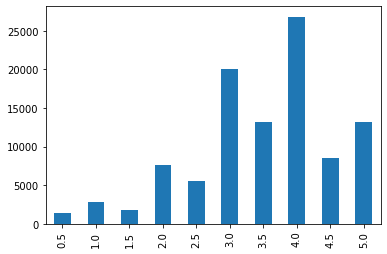

In [53]:
s.plot(kind='bar')

### Getting Data In/Out

We have already seen, read_csv, so let's try writing some results to a CSV.

Recall what the joined_df looks like:

In [54]:
joined_df

,count,mean,title,genres
movieId,,,,
1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
4,7,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
5,49,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
193581,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,1,3.500000,Flint (2017),Drama


Write the *joined_df* to a csv file using to_csv.

In [55]:
#pd.DataFrame.to_csv?

In [56]:
csv_file_path = pjoin('data', 'results', 'ratings_results.csv')
joined_df.to_csv(csv_file_path)

We can also read and write Microsoft Excel file using read_excel and write_excel.

In [57]:
#pd.DataFrame.to_excel?

In [58]:
excel_file_path = pjoin('data', 'results', 'ratings_results.xlsx')
joined_df.to_excel(excel_file_path, sheet_name='sheet1')

In [59]:
#df_from_excel = pd.read_excel?

In [60]:
df_from_excel = pd.read_excel(excel_file_path, index_col='movieId')
df_from_excel

,count,mean,title,genres
movieId,,,,
1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
4,7,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
5,49,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
193581,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,1,3.500000,Flint (2017),Drama
